In [2]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
import time
import csv
import os
import numpy as np

In [3]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions
# mp_hands = mp.solutions.hands

# Test Detection & Make Landmark

In [4]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)

# Initiate holistic model
prevTime = 0
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        ###
        initialTime = time.time()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        ### First point
        firstTime = time.time() - initialTime
        cv2.putText(image, f'1: {round(firstTime,3)}', (20,100), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        ### Seocnd point
        secondTime = time.time() - initialTime
        cv2.putText(image, f'2: {round(secondTime,3)}', (20,150), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        # Calculate FPS
        currTime = time.time()
        fps = 1 / (currTime - prevTime)
        prevTime = currTime
        cv2.putText(image, f'FPS: {round(fps,3)}', (20,40), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [34]:
# num_pose_coords = len(results.pose_landmarks.landmark)
# num_pose_coords

33

In [4]:
num_pose_coords = 22
num_pose_coords

22

In [5]:
# "LEFT" hand coords
# num_left_hand_coords = len(results.right_hand_landmarks.landmark)
num_left_hand_coords = 20
num_left_hand_coords

20

In [6]:
# "RIGHT" hand coords
# num_right_hand_coords = len(results.left_hand_landmarks.landmark)
num_right_hand_coords = 20
num_right_hand_coords

20

In [7]:
num_hand_coords = num_right_hand_coords + num_left_hand_coords
num_hand_coords

40

In [8]:
num_pose_hand_coords = num_pose_coords + num_right_hand_coords + num_left_hand_coords
num_pose_hand_coords

62

In [9]:
# num_face_coords = len(results.face_landmarks.landmark)
num_face_coords = 467
num_face_coords

467

In [10]:
# pose_hand_landmarks = ['class']
# for val in range(1, num_pose_hand_coords+1):
#     pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [11]:
face_landmarks = ['class']
for val in range(1, num_face_coords+1):
    face_landmarks += ['x{}'.format(val), 'y{}'.format(val)]

In [12]:
# pose_landmarks = ['class']
# for val in range(1, num_pose_coords+1):
#     pose_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [13]:
# hand_landmarks = ['class']
# for val in range(1, num_hand_coords+1):
#     hand_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]

In [14]:
pose_hand_landmarks = ['class']
for val in range(1, num_pose_coords+1):
    pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val)]
for val in range(num_pose_coords+1, num_pose_coords+num_hand_coords+1):
    pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val)]

# Set the Directory Path

In [15]:
path_rawData = ".//rawData"
path_model = ".//model"

# Pose & Hand Recording

In [16]:
# with open('sample.csv', mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(pose_hand_landmarks)

In [17]:
pose_hand_file = '//210923pose_hand_sample.csv'
with open(path_rawData + pose_hand_file, mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(pose_hand_landmarks)

In [44]:
class_name = "11"

In [45]:
### Revise one
### Remove unnecessary value & Hand Coordinate Move

start = False
waiting = False
checker = False
waiting_time = time.time()
max_time_end = time.time()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        if start:
            # Export coordinates
            try:
                # Extract Pose landmarks
                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[pose[i].x-pose[0].x, pose[i].y-pose[0].y] 
                                          for i in range(1, num_pose_coords+1)]).flatten())
                try:
                    # Extract "RIGHT" Hand lanmarks
                    righthand = results.left_hand_landmarks.landmark
                    righthand_row = list(np.array([[righthand[i].x - righthand[0].x, righthand[i].y - righthand[0].y]
                                                   for i in range(1,num_right_hand_coords+1)]).flatten())
                except:
                    righthand_row = [0 for i in range(num_right_hand_coords*2)]

                try:
                    # Extract "LEFT" Hand lanmarks
                    lefthand = results.right_hand_landmarks.landmark
                    lefthand_row = list(np.array([[lefthand[i].x - lefthand[0].x, lefthand[i].y - lefthand[0].y]
                                                  for i in range(1,num_left_hand_coords+1)]).flatten())
                except:
                    lefthand_row = [0 for i in range(num_left_hand_coords*2)]
                        
                
                # Concate rows
                row = pose_row + righthand_row + lefthand_row

                # Append class name 
                row.insert(0, class_name)
            

                # Export to CSV
                with open(path_rawData + pose_hand_file, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
            except:
                pass
                        
        cv2.imshow('Gather Pose Data', image)
        
        # r키를 눌러서 녹화 시작 - 20초간 녹화
        if cv2.waitKey(10) & 0xFF == ord('r'):
            print("Wait 3 seconds")
            waiting_time = time.time() + (3)
            checker = True
            
        if time.time() > waiting_time and checker == True:
            waiting = True
            checker = False
                
        if waiting:
            print("Recording Start!")
            max_time_end = time.time() + (60)
            start = True
            waiting = False
        
        # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
        if time.time() > max_time_end and start == True:
            start = False
            break
        
        # q키를 눌러서 강제로 녹화 종료 가능
        if cv2.waitKey(10) & 0xFF == ord('q'):
            start = False
            break

cap.release()
cv2.destroyAllWindows()

Wait 3 seconds
Recording Start!


In [ ]:
# ### Revise one

# start = False
# waiting = False
# checker = False
# waiting_time = time.time()
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
        
#         if start:
#             # Export coordinates
#             try:
#                 # Extract Pose landmarks
#                 pose = results.pose_landmarks.landmark
#                 pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten()) 
                
#                 try:
#                     # Extract "RIGHT" Hand lanmarks
#                     righthand = results.left_hand_landmarks.landmark
#                     righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in righthand]).flatten())
#                 except:
#                     righthand_row = [0 for i in range(num_right_hand_coords*3)]

#                 try:
#                     # Extract "LEFT" Hand lanmarks
#                     lefthand = results.right_hand_landmarks.landmark
#                     lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lefthand]).flatten())
#                 except:
#                     lefthand_row = [0 for i in range(num_left_hand_coords*3)]
                        
                
#                 # Concate rows
#                 row = pose_row + righthand_row + lefthand_row

#                 # Append class name 
#                 row.insert(0, class_name)
            

#                 # Export to CSV
#                 with open(path_rawData + pose_hand_file, mode='a', newline='') as f:
#                     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                     csv_writer.writerow(row)
#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Wait 3 seconds")
#             waiting_time = time.time() + (3)
#             checker = True
            
#         if time.time() > waiting_time and checker == True:
#             waiting = True
#             checker = False
                
#         if waiting:
#             print("Recording Start!")
#             max_time_end = time.time() + (10)
#             start = True
#             waiting = False
        
#         # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

In [36]:
# ### 손 하나가 안보이면 예외처리가 되는 에러

# start = False
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
# #         # 1. Draw face landmarks
# #         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
# #                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
# #                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
# #                                  )
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
        
#         if start:
#             # Export coordinates
#             try:
#                 # Extract Pose landmarks
#                 pose = results.pose_landmarks.landmark
#                 pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

# #                 # Extract Face landmarks
# #                 face = results.face_landmarks.landmark
# #                 face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
                
#                 # Extract "RIGHT" Hand lanmarks
#                 righthand = results.left_hand_landmarks.landmark
#                 righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in righthand]).flatten())
                
#                 # Extract "LEFT" Hand lanmarks
#                 lefthand = results.right_hand_landmarks.landmark
#                 lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in lefthand]).flatten())
                
#                 # Concate rows
#                 row = pose_row + righthand_row + lefthand_row
 
#                 # Append class name 
#                 row.insert(0, class_name)
                
#                 # Export to CSV
#                 with open('pose_hand_sample.csv', mode='a', newline='') as f:
#                     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                     csv_writer.writerow(row)

#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Recording Start!")
#             max_time_end = time.time() + (5)
#             start = True
        
#         # r키를 눌러서 녹화 시작 후 15초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

Recording Start!


# Hand Recording

In [73]:
# hand_file = '//210910hand_sample.csv'
# with open(path_rawData+fileName, mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(hand_landmarks)

In [74]:
# class_name = "0"

In [26]:
# ### Revise one

# start = False
# waiting = False
# checker = False
# right = True
# left = True

# waiting_time = time.time()
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )
        
# #         righthand = results.left_hand_landmarks.landmark
# #         for landmark in righthand:
# #             print(landmark)
        
#         if start:
#             # Export coordinates
#             try:
                
#                 try:
#                     # Extract "RIGHT" Hand lanmarks
#                     righthand = results.left_hand_landmarks.landmark
#                     righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in righthand]).flatten())
#                     right = True
#                 except:
#                     righthand_row = [0 for i in range(num_right_hand_coords*3)]
#                     right = False

#                 try:
#                     # Extract "LEFT" Hand lanmarks
#                     lefthand = results.right_hand_landmarks.landmark
#                     lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lefthand]).flatten())
#                     left = True
#                 except:
#                     lefthand_row = [0 for i in range(num_left_hand_coords*3)]
#                     left = False
                
#                 if right != False or left != False:
#                     # Concate rows
#                     row = righthand_row + lefthand_row

#                     # Append class name 
#                     row.insert(0, class_name)


#                     # Export to CSV
#                     with open(path_rawData + hand_file, mode='a', newline='') as f:
#                         csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                         csv_writer.writerow(row)
                        
#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Wait 3 seconds")
#             waiting_time = time.time() + (3)
#             checker = True
            
#         if time.time() > waiting_time and checker == True:
#             waiting = True
#             checker = False
                
#         if waiting:
#             print("Recording Start!")
#             max_time_end = time.time() + (10)
#             start = True
#             waiting = False
        
#         # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

# Face Recording

In [46]:
face_file = '//210923face_sample.csv'
with open(path_rawData + face_file, mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(face_landmarks)

In [53]:
class_name = "2"

In [ ]:
start = False
max_time_end = time.time()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        if start:
            # Export coordinates
            try:
                # Extract Face landmarks
                face = results.face_landmarks.landmark
#                 face_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in face]).flatten())            
                face_row = list(np.array([[face[i].x-face[0].x, face[i].y-face[0].y] 
                                          for i in range(1, num_face_coords+1)]).flatten())
                # Concate rows
                row = face_row

                # Append class name 
                row.insert(0, class_name)

                # Export to CSV
                with open(path_rawData + face_file, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)

            except:
                pass
                        
        cv2.imshow('Gather Pose Data', image)
        
        # r키를 눌러서 녹화 시작 - 20초간 녹화
        if cv2.waitKey(10) & 0xFF == ord('r'):
            print("Recording Start!")
            max_time_end = time.time() + (60)
            start = True
        
        # r키를 눌러서 녹화 시작 후 15초 후에 녹화 종료
        if time.time() > max_time_end and start == True:
            start = False
            break
        
        # q키를 눌러서 강제로 녹화 종료 가능
        if cv2.waitKey(10) & 0xFF == ord('q'):
            start = False
            break

cap.release()
cv2.destroyAllWindows()

Recording Start!


# Train Custom Model Using Scikit Learn

In [68]:
# Read in Collected Data and Process
import pandas as pd
from sklearn.model_selection import train_test_split

# Train Machine Learning Classification Model
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluate and Serialize Model
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

### Read in Collected Data and Process

In [148]:
pose_hand_df = pd.read_csv(path_rawData + '//210916pose_hand_sample.csv')
face_df = pd.read_csv(path_rawData + '//210916face_sample.csv')

In [149]:
# Remove NaN Value
pose_hand_df = pose_hand_df.dropna(axis=0)
face_df = face_df.dropna(axis=0)

In [150]:
pose_hand_df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62
0,0,0.020227,-0.072267,0.036556,-0.074493,0.051895,-0.076308,-0.018773,-0.066373,-0.032549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.020037,-0.072051,0.036657,-0.074284,0.050714,-0.076070,-0.019436,-0.066314,-0.032816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.020876,-0.072786,0.037200,-0.075197,0.050771,-0.077032,-0.020519,-0.065998,-0.033733,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.021113,-0.072615,0.036179,-0.074978,0.049913,-0.076647,-0.020213,-0.064991,-0.033728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.019949,-0.072617,0.033497,-0.074970,0.048007,-0.076624,-0.021067,-0.065046,-0.035436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
pose_hand_df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62
8074,13,0.013920,-0.023610,0.028235,-0.019942,0.043324,-0.015015,-0.023438,-0.014207,-0.035886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8075,13,0.013905,-0.023374,0.028145,-0.019605,0.043082,-0.014636,-0.023444,-0.014798,-0.035842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8076,13,0.013978,-0.023303,0.028182,-0.019448,0.043078,-0.014416,-0.023298,-0.014908,-0.035659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8077,13,0.014171,-0.024445,0.028381,-0.020559,0.043308,-0.015518,-0.023185,-0.016453,-0.035571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8078,13,0.014419,-0.024483,0.028442,-0.020628,0.043223,-0.015624,-0.022697,-0.016564,-0.035057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
face_df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
0,0,-0.003051,-0.044349,-0.000473,-0.030800,-0.009390,-0.099516,-0.003577,-0.060845,-0.003184,...,0.025926,-0.146778,0.020214,-0.142171,0.016648,-0.138689,0.069570,-0.160062,0.074271,-0.166480
1,0,-0.003127,-0.044127,-0.000420,-0.030823,-0.009351,-0.099323,-0.003634,-0.060560,-0.003176,...,0.026400,-0.146538,0.020689,-0.141988,0.017073,-0.138507,0.070180,-0.159019,0.074981,-0.165658
2,0,-0.002914,-0.044453,-0.000267,-0.030968,-0.009069,-0.099489,-0.003408,-0.060871,-0.002935,...,0.026675,-0.146564,0.020951,-0.141993,0.017337,-0.138508,0.070417,-0.159030,0.075225,-0.165551
3,0,-0.002972,-0.043272,-0.000254,-0.030341,-0.009029,-0.098722,-0.003471,-0.059676,-0.002955,...,0.026980,-0.146920,0.021199,-0.142168,0.017544,-0.138502,0.070820,-0.159867,0.075566,-0.166285
4,0,-0.002916,-0.043865,-0.000269,-0.030669,-0.009026,-0.098841,-0.003398,-0.060204,-0.002913,...,0.026755,-0.146644,0.021017,-0.141938,0.017385,-0.138311,0.070534,-0.160039,0.075247,-0.166441


In [153]:
face_df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
1353,2,0.000096,-0.052737,-0.001128,-0.037802,-0.007831,-0.101024,0.000142,-0.067569,-0.000514,...,0.013450,-0.142840,0.009845,-0.138459,0.008152,-0.135407,0.046203,-0.151635,0.049750,-0.159591
1354,2,0.000348,-0.051603,-0.000980,-0.036816,-0.007636,-0.099764,0.000388,-0.066452,-0.000265,...,0.014234,-0.141447,0.010504,-0.137038,0.008703,-0.134013,0.047580,-0.150983,0.051134,-0.158837
1355,2,0.000358,-0.050638,-0.000937,-0.036296,-0.007812,-0.099038,0.000334,-0.065467,-0.000405,...,0.013777,-0.141579,0.010102,-0.137082,0.008335,-0.133962,0.046967,-0.151641,0.050509,-0.159423
1356,2,0.000712,-0.050844,-0.000668,-0.036173,-0.007138,-0.099135,0.000776,-0.065689,0.000151,...,0.014287,-0.140768,0.010647,-0.136416,0.008895,-0.133433,0.047458,-0.151018,0.050973,-0.158356
1357,2,0.000528,-0.051160,-0.000783,-0.036536,-0.007321,-0.099287,0.000600,-0.065949,-0.000013,...,0.014475,-0.140855,0.010761,-0.136505,0.008978,-0.133504,0.047763,-0.150421,0.051344,-0.158145


In [154]:
pose_hand_X = pose_hand_df.drop('class', axis=1) # features
pose_hand_y = pose_hand_df['class'] # target value
face_X = face_df.drop('class', axis=1) # features
face_y = face_df['class'] # target value

In [155]:
pose_hand_X_train, pose_hand_X_test, pose_hand_y_train, pose_hand_y_test = train_test_split(pose_hand_X, pose_hand_y, stratify=pose_hand_y, test_size=0.25, random_state=1234)
face_X_train, face_X_test, face_y_train, face_y_test = train_test_split(face_X, face_y, stratify=face_y, test_size=0.25, random_state=1234)

In [156]:
pose_hand_y_train.value_counts()

3     670
4     668
1     667
10    667
0     361
13    359
8     335
5     335
2     334
7     333
11    333
12    333
9     332
6     332
Name: class, dtype: int64

In [157]:
pose_hand_y_test.value_counts()

3     223
1     223
4     223
10    223
13    120
0     120
9     111
5     111
11    111
8     111
6     111
2     111
7     111
12    111
Name: class, dtype: int64

In [158]:
face_y_train.value_counts()

0    340
2    339
1    339
Name: class, dtype: int64

In [159]:
face_y_test.value_counts()

0    114
1    113
2    113
Name: class, dtype: int64

### Train Machine Learning Classificaiton Model for pose_hand

In [160]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'sv':make_pipeline(StandardScaler(), SVC()),
}

In [161]:
pose_hand_fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(pose_hand_X_train, pose_hand_y_train)
    pose_hand_fit_models[algo] = model

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [162]:
pose_hand_fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'sv': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

In [163]:
pose_hand_fit_models['sv'].predict(pose_hand_X_test)

array([ 9,  3,  3, ...,  8, 10,  1], dtype=int64)

In [164]:
# Test for pose_hand_fit_models
for algo, model in pose_hand_fit_models.items():
    pred = model.predict(pose_hand_X_test)
    print(algo, accuracy_score(pose_hand_y_test, pred))

lr 0.9995049504950495
rc 0.996039603960396
rf 0.999009900990099
gb 0.999009900990099
sv 0.997029702970297


In [165]:
# Export pose_hand_fit_models
modelName = '//210916pose_hand.pkl'
with open(path_model + modelName, 'wb') as f:
    pickle.dump(pose_hand_fit_models['rf'], f)

### Train Machine Learning Classificaiton Model for face

In [110]:
face_fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(face_X_train, face_y_train)
    face_fit_models[algo] = model

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [111]:
face_fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'sv': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

In [112]:
# Test for face_fit_models
for algo, model in face_fit_models.items():
    pred = model.predict(face_X_test)
    print(algo, accuracy_score(face_y_test, pred))

lr 1.0
rc 0.9970588235294118
rf 0.9970588235294118
gb 0.9970588235294118
sv 1.0


In [113]:
# Export pose_hand_fit_models
modelName = '//210916face.pkl'
with open(path_model + modelName, 'wb') as f:
    pickle.dump(face_fit_models['rf'], f)

# Test DEMO

In [114]:
#######################
### Make Code Clear ###
#######################

mp_holistic = mp.solutions.holistic  # Mediapipe Solutions

pose_hand_model = "//210916pose_hand.pkl"
face_model = "//210916face.pkl"

# Load Model
with open(path_model + pose_hand_model, 'rb') as f:
    pose_hand_model = pickle.load(f)
with open(path_model + face_model, 'rb') as f:
    face_model = pickle.load(f)


cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)
prevTime = 0
readData = True

# def sample(x,y):
#     return x,y

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Start point: Timer for make dataframe
        if readData:
            beginTime = time.time()
            readData = False
        
        ### Start point: Timer for Debugging
        initialTime = time.time()

        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False        
        
        # Make Detectionsq
        results = holistic.process(image)
                
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # --------------------------------------------------------------------------------------------- #
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # --------------------------------------------------------------------------------------------- #
        
        
        # Export Pose-Hand coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[pose[i].x-pose[0].x, pose[i].y-pose[0].y] 
                          for i in range(1, num_pose_coords+1)]).flatten())
            # Extract "RIGHT" Hand lanmarks
            try:
                righthand = results.left_hand_landmarks.landmark
                righthand_row = list(np.array([[righthand[i].x - righthand[0].x, righthand[i].y - righthand[0].y]
                               for i in range(1,num_right_hand_coords+1)]).flatten())
            except:
                righthand_row = [0 for i in range(num_right_hand_coords*2)]

            # Extract "LEFT" Hand lanmarks
            try:
                lefthand = results.right_hand_landmarks.landmark
                lefthand_row = list(np.array([[lefthand[i].x - lefthand[0].x, lefthand[i].y - lefthand[0].y]
                                                  for i in range(1,num_left_hand_coords+1)]).flatten())
            except:
                lefthand_row = [0 for i in range(num_left_hand_coords*2)]
            
            # Concate rows
            pose_hand_row = pose_row+righthand_row+lefthand_row
            
            # Make Prediction
            pose_hand_class = pose_hand_model.predict([pose_hand_row])[0]
            pose_hand_prob = pose_hand_model.predict_proba([pose_hand_row])[0]
                     
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(pose_hand_class)
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(pose_hand_prob[np.argmax(pose_hand_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
            
        # Export Face coordinates
        try:
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[face[i].x - face[0].x, face[i].y - face[0].y]
                                                  for i in range(1,num_face_coords+1)]).flatten())
            
            
            # Make Prediction
            face_class = face_model.predict([face_row])[0]
            face_prob = face_model.predict_proba([face_row])[0]
            
            
            # Get status box
            cv2.rectangle(image, (250,0), (500, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (345,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, face_class.split(' ')[0]
                        , (340,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (265,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(face_prob[np.argmax(face_prob)],2))
                        , (260,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
        
        # Calculate FPS
        currTime = time.time()
        fps = 1 / (currTime - prevTime)
        prevTime = currTime
        cv2.putText(image, f'FPS: {round(fps,3)}', (20,100), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Virtual Cam DEMO

In [202]:
# Load Pose_Hand_Images with Array Test
from PIL import Image
import os, os.path

pose_hand_imgs = []
path = "./effect/sample/"
fileType = '.png'
fileList = os.listdir(path)
fileList.sort()
print(fileList)
for i in range(0,20):
    imgs.append(Image.open(path+str(i)+fileType))

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './effect/sample/'

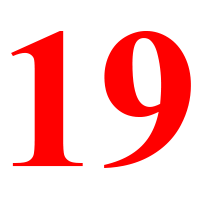

In [330]:
imgs[19]

In [ ]:
# VirtualCam DEMO